<a href="https://colab.research.google.com/github/FrederickUdis/Datos-Bancarios/blob/main/Analisis_datos_bancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

data = pd.read_csv('/content/drive/MyDrive/dataset/Churn_Modelling.csv')
data2 = data
data.head()

In [ ]:
print("Nombres de las columnas del dataset:")
print(data.columns)
print("\n")

Nombres de las columnas del dataset:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')




In [ ]:
##Datos nulos
data.isnull().sum().sum()

0

In [ ]:
print("Cantidad de datos en el dataset:")
print(f"Número de filas: {data.shape[0]}")
print(f"Número de columnas: {data.shape[1]}")


Cantidad de datos en el dataset:
Número de filas: 10000
Número de columnas: 14


In [ ]:
correlation_matrix = data.corr()
print("Matriz de correlación:")
print(correlation_matrix)
print("\n")

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
import seaborn as sns

# Estadísticas descriptivas
print(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe())

# Histogramas para cada variable
variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Boxplots para cada variable
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()

# Matriz de correlación
correlation_matrix = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Boxplots para cada variable vs. Exited
variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Exited'], y=data[var])
    plt.title(f'Boxplot de {var} vs. Exited')
    plt.xlabel('Exited')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

# Gráficos de barras para variables categóricas vs. Exited
categorical_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
for cat_var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_var, hue='Exited', data=data)
    plt.title(f'Gráfico de barras de {cat_var} vs. Exited')
    plt.xlabel(cat_var)
    plt.ylabel('Cantidad')
    plt.grid(True)
    plt.legend(title='Exited')
    plt.show()

# Matriz de correlación con respecto a 'Exited'
correlation_matrix = data.corr()[['Exited']].sort_values(by='Exited', ascending=False)
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación con respecto a Exited')
plt.show()

In [ ]:
data.head()

In [ ]:
# Eliminar las columnas 'RowNumber' y 'CustomerId' del dataframe 'data'
data = data.drop(columns=['RowNumber', 'CustomerId','Surname'])

# Verificar que las columnas se hayan eliminado
data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop('Exited', axis=1)
y = data['Exited']

In [ ]:
#Division de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# PreProcesamiento de los datos
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
numeric_transformer = StandardScaler()

categorical_features = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
## Regrecion Logistica
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

y_pred_logistic = pipeline.predict(X_test)
print("Regresión Logística:")
print("Precisión:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1-score:", f1_score(y_test, y_pred_logistic))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_logistic))
print("------------------------------------------------")

Regresión Logística:
Precisión: 0.5563380281690141
Recall: 0.2010178117048346
F1-score: 0.29532710280373836
Matriz de Confusión:
 [[1544   63]
 [ 314   79]]
------------------------------------------------


In [ ]:
## Arboles de decision
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)
y_pred_tree = pipeline.predict(X_test)
print("Árboles de Decisión:")
print("Precisión:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("------------------------------------------------")

Árboles de Decisión:
Precisión: 0.4459770114942529
Recall: 0.49363867684478374
F1-score: 0.46859903381642515
Matriz de Confusión:
 [[1366  241]
 [ 199  194]]
------------------------------------------------


In [ ]:
## Bosques aleatorios
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
y_pred_forest = pipeline.predict(X_test)
print("Bosques Aleatorios:")
print("Precisión:", precision_score(y_test, y_pred_forest))
print("Recall:", recall_score(y_test, y_pred_forest))
print("F1-score:", f1_score(y_test, y_pred_forest))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_forest))
print("------------------------------------------------")

Bosques Aleatorios:
Precisión: 0.7580645161290323
Recall: 0.47837150127226463
F1-score: 0.5865834633385335
Matriz de Confusión:
 [[1547   60]
 [ 205  188]]
------------------------------------------------


In [ ]:
## Maquinas de soporte vectorial
from sklearn.svm import SVC

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

pipeline.fit(X_train, y_train)
y_pred_svc = pipeline.predict(X_test)
print("Máquinas de Soporte Vectorial:")
print("Precisión:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1-score:", f1_score(y_test, y_pred_svc))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svc))
print("------------------------------------------------")


Máquinas de Soporte Vectorial:
Precisión: 0.7889447236180904
Recall: 0.3994910941475827
F1-score: 0.5304054054054055
Matriz de Confusión:
 [[1565   42]
 [ 236  157]]
------------------------------------------------


In [ ]:
## Gradient Boosting (XGBoost)
import xgboost as xgb

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier())
])

pipeline.fit(X_train, y_train)

y_pred_xgb = pipeline.predict(X_test)
print("XGBoost:")
print("Precisión:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("------------------------------------------------")

XGBoost:
Precisión: 0.6953405017921147
Recall: 0.49363867684478374
F1-score: 0.5773809523809524
Matriz de Confusión:
 [[1522   85]
 [ 199  194]]
------------------------------------------------


In [ ]:
## Redes Neurolnales
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,)))
])

pipeline.fit(X_train, y_train)

y_pred_mlp = pipeline.predict(X_test)
print("Redes Neuronales:")
print("Precisión:", precision_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1-score:", f1_score(y_test, y_pred_mlp))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_mlp))

Redes Neuronales:
Precisión: 0.7307692307692307
Recall: 0.48346055979643765
F1-score: 0.5819295558958651
Matriz de Confusión:
 [[1537   70]
 [ 203  190]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Mejora modelo de redes neuronales**

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,result
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
categorical_columns = ['Geography', 'Gender']
one_hot_encoded = pd.get_dummies(data[categorical_columns])
data_encoded = pd.concat([data, one_hot_encoded], axis=1)
data_encoded.drop(categorical_columns, axis=1, inplace=True)

# 3. Escalado de características continuas
continuous_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_encoded[continuous_columns] = scaler.fit_transform(data_encoded[continuous_columns])

# Mostrar las primeras filas del dataframe procesado
print(data_encoded.head())

   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538  0.324324     0.2  0.000000       0.000000          1   
1        0.516  0.310811     0.1  0.334031       0.000000          0   
2        0.304  0.324324     0.8  0.636357       0.666667          1   
3        0.698  0.283784     0.1  0.000000       0.333333          0   
4        1.000  0.337838     0.2  0.500246       0.000000          1   

   IsActiveMember  EstimatedSalary  result  Geography_France  \
0               1         0.506735       1                 1   
1               1         0.562709       0                 0   
2               0         0.569654       1                 1   
3               0         0.469120       0                 1   
4               1         0.395400       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1         

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Classifier: Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1593
           1       0.53      0.17      0.26       407

    accuracy                           0.80      2000
   macro avg       0.67      0.57      0.57      2000
weighted avg       0.76      0.80      0.76      2000


---------------------------------------------



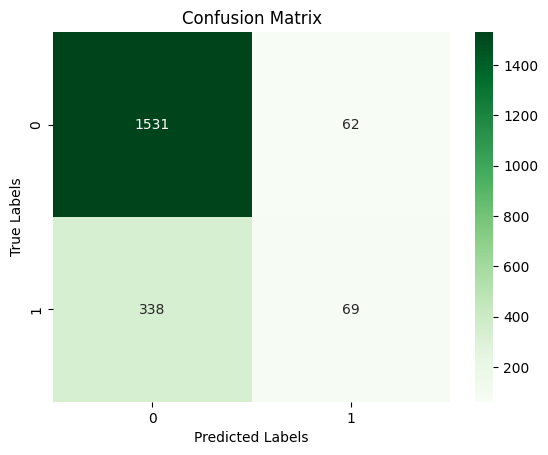

-----------------------
Classifier: Decision Tree
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1593
           1       0.50      0.49      0.49       407

    accuracy                           0.80      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000


---------------------------------------------



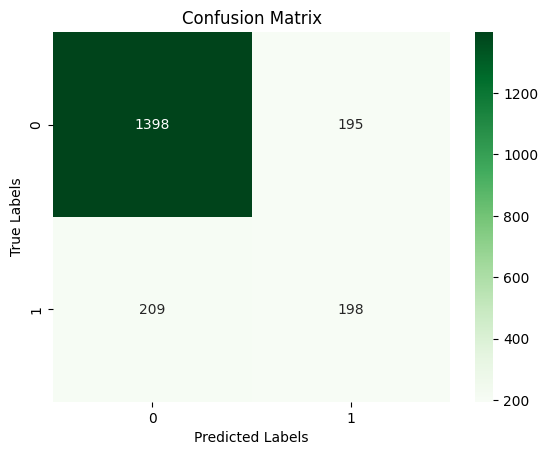

-----------------------
Classifier: Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


---------------------------------------------



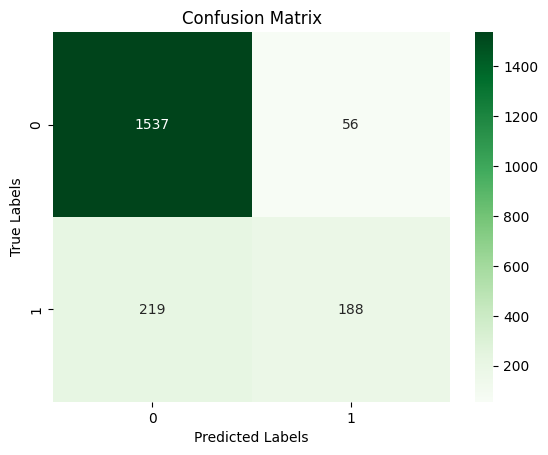

-----------------------
Classifier: KNN
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1593
           1       0.55      0.30      0.39       407

    accuracy                           0.81      2000
   macro avg       0.69      0.62      0.64      2000
weighted avg       0.78      0.81      0.78      2000


---------------------------------------------



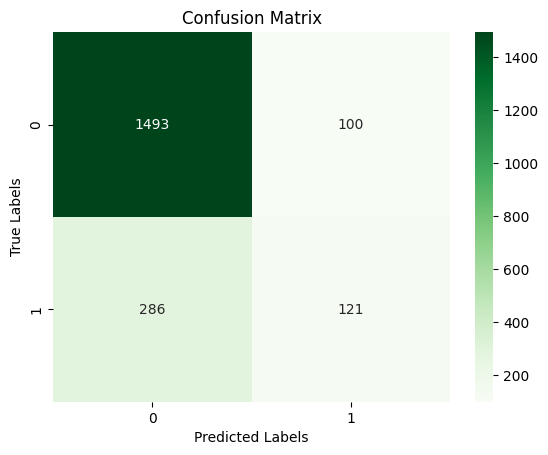

-----------------------
Classifier: Gaussian NB
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1593
           1       0.51      0.34      0.41       407

    accuracy                           0.80      2000
   macro avg       0.68      0.63      0.64      2000
weighted avg       0.78      0.80      0.78      2000


---------------------------------------------



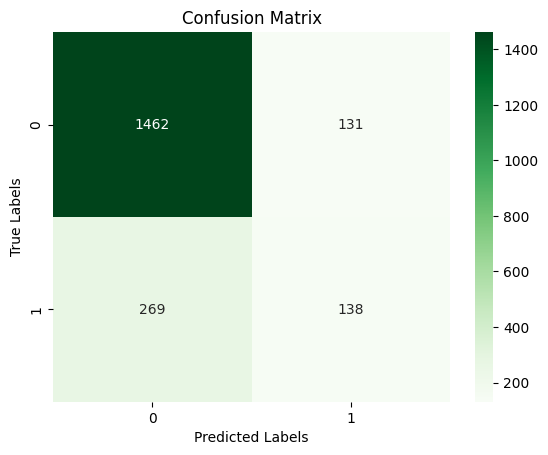

-----------------------
Classifier: XGB
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.72      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000


---------------------------------------------



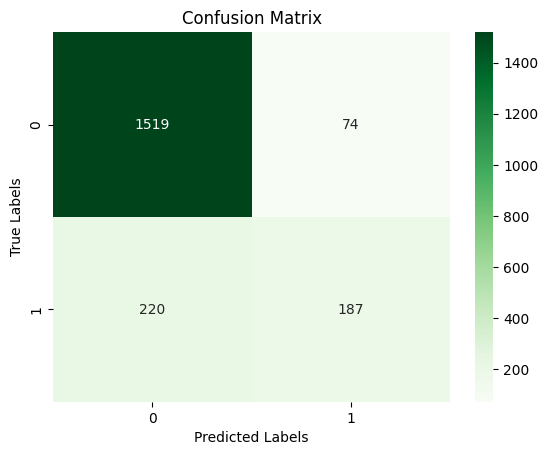

-----------------------
Classifier (with SMOTE): Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1593
           1       0.71      0.70      0.70      1593

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186


---------------------------------------------



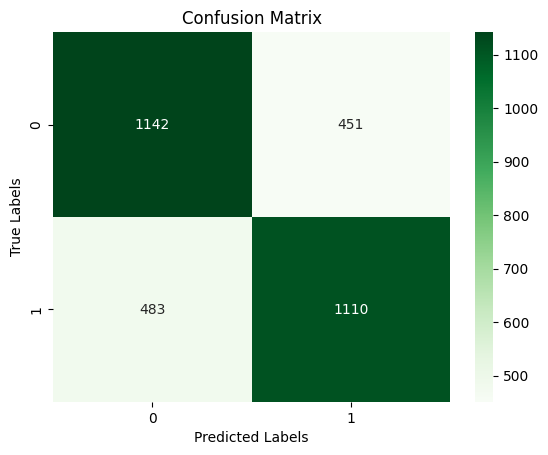

-----------------------
Classifier (with SMOTE): Decision Tree
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1593
           1       0.85      0.86      0.85      1593

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186


---------------------------------------------



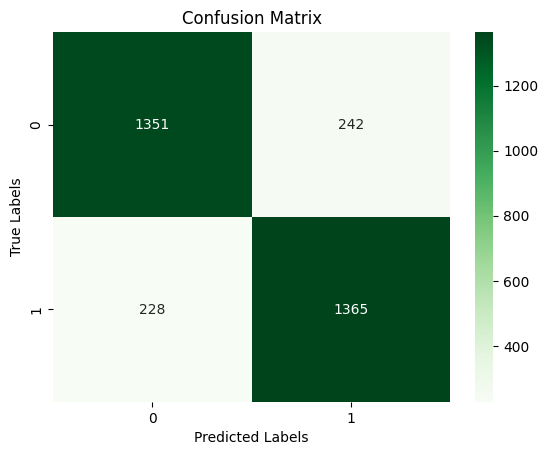

-----------------------
Classifier (with SMOTE): Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1593
           1       0.90      0.91      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186


---------------------------------------------



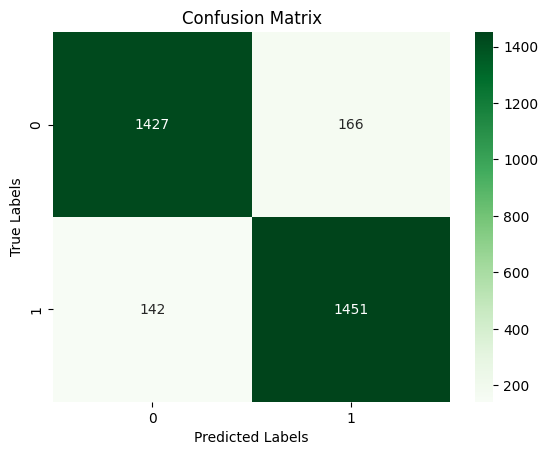

-----------------------
Classifier (with SMOTE): KNN
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1593
           1       0.77      0.93      0.84      1593

    accuracy                           0.83      3186
   macro avg       0.84      0.83      0.83      3186
weighted avg       0.84      0.83      0.83      3186


---------------------------------------------



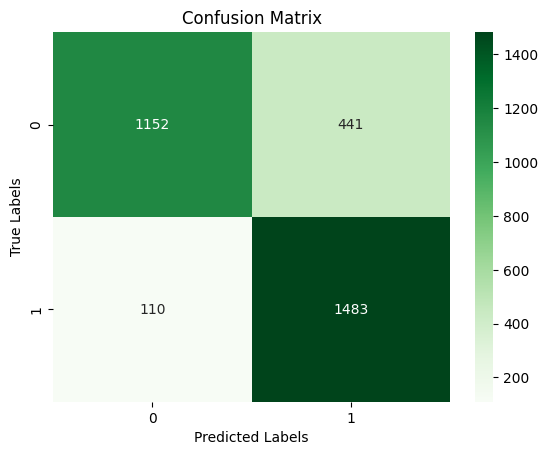

-----------------------
Classifier (with SMOTE): Gaussian NB
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1593
           1       0.73      0.69      0.71      1593

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186


---------------------------------------------



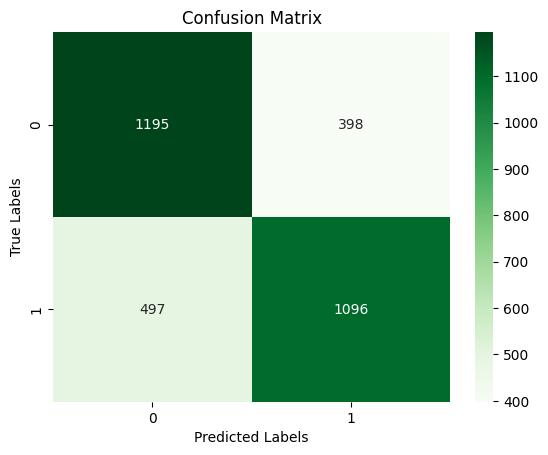

-----------------------
Classifier (with SMOTE): XGB
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.93      0.87      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186


---------------------------------------------



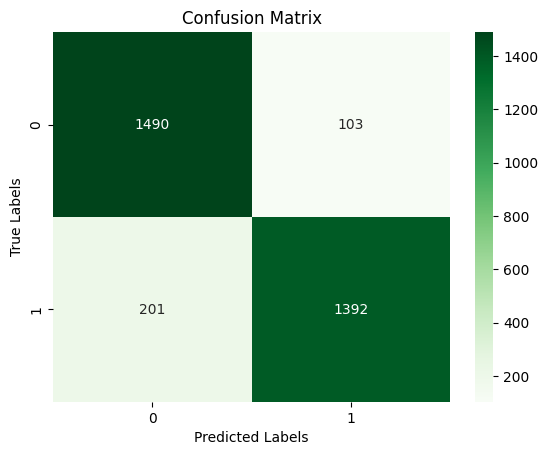

-----------------------


In [ ]:
# 4. División de datos en características y etiquetas
X = data_encoded.drop('result', axis=1)
y = data_encoded['result']

# 5. División de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

# 6. Evaluación de modelos
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='.0f')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# 7. Entrenamiento y evaluación de varios clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import cross_val_score

classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussian NB', GaussianNB()),
    ('XGB', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Classifier: {clf_name}')
    evaluate_model(y_test, y_pred)
    print('-----------------------')

# 8. Uso de SMOTE para manejar el desequilibrio de clases
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# 9. Entrenamiento y evaluación de clasificadores con datos balanceados
for clf_name, clf in classifiers:
    clf.fit(X_train_sm, y_train_sm)
    y_pred_sm = clf.predict(X_test_sm)
    print(f'Classifier (with SMOTE): {clf_name}')
    evaluate_model(y_test_sm, y_pred_sm)
    print('-----------------------')